# Tugas Akhir Analisis Algoritma

Muhammad Aditya Bayhaqie  : 09021282227122

Nabila Nurhusna Yap       : 09021182227032

Tugas :

Lakukan analisis algoritma dan buatlah implementasinya (bahasa pemrograman bebas) dengan langkah-langkah sebagai berikut:  

---

**Analisis Algoritma pencarian**

Bandingkan dua algoritma pencarian yang lebih efisien dibanding pencarian sekuensial.  
Hitung kompleksitas waktu dan kompleksitas ruang dari setiap algoritma yang dianalisis menggunakan notasi Big-O.  
Diskusikan kelebihan dan kekurangan masing-masing algoritma dalam konteks data transaksi yang besar.  

---

**Analisis Algoritma Pengurutan**

Bandingkan minimal dua algoritma pengurutan
Hitung kompleksitas waktu (best case, average case, worst case) dan kompleksitas ruang masing-masing algoritma menggunakan notasi Big-O.  
Berikan analisis mengenai algoritma yang paling sesuai digunakan dalam skenario data transaksi besar

---

**Implementasi Algoritma dalam Bahasa Pemrograman**

Implementasikan algoritma pencarian dan pengurutan yang dipilih dalam bahasa pemrograman (bebas pilih).

Buatlah dataset transaksi tiruan dengan minimal 10.000 data sebagai bahan pengujian. Data memiliki: ID, Nama Pelanggan, Tanggal Pembelian, Jumlah pembelian

Uji performa algoritma pada dataset tersebut dan bandingkan waktu eksekusinya untuk kasus pencarian dan pengurutan yg telah dipilih.

## Tugas 1 : Algoritma Pencarian

### Algoritma yang Dibandingkan:
1. **Jump Search**
2. **Interpolation Search**

### Jump Search

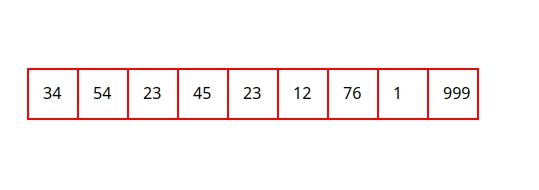

- **Prinsip:**  
  Melompat sebesar √n langkah, lalu linear search pada blok relevan.
- **Kompleksitas Waktu:**
  - Best case: O(1)
  - Average/Worst case: O(√n)
- **Kompleksitas Ruang:** O(1)

**Kelebihan:**
- Lebih cepat daripada Sequential Search.
- Cocok untuk data besar yang sudah terurut.

**Kekurangan:**
- Harus data *terurut*.
- Performa tidak secepat Binary Search.

### Interpolation Search

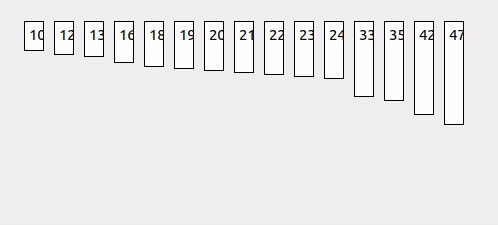

- **Prinsip:**  
  Mengestimasi posisi berdasarkan nilai kunci, cocok untuk data dengan distribusi merata.
- **Kompleksitas Waktu:**
  - Best case: O(1)
  - Average case: O(log log n)
  - Worst case: O(n) (jika distribusi buruk)
- **Kompleksitas Ruang:** O(1)

**Kelebihan:**
- Lebih cepat dari Binary Search pada data besar dengan distribusi seragam.
  
**Kekurangan:**
- Sangat bergantung pada distribusi data.
- Tidak stabil jika distribusi data tidak merata.

## Tugas 2 : Algoritma Pengurutan

### Algoritma yang Dibandingkan:
1. **Heap Sort**
2. **Radix Sort**

### Heap Sort

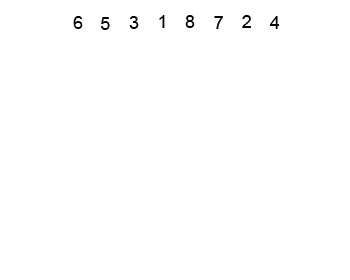

- **Prinsip:**  
  Membentuk heap dari data, kemudian ekstraksi elemen maksimum satu per satu.
- **Kompleksitas Waktu:**
  - Best/Average/Worst case: O(n log n)
- **Kompleksitas Ruang:** O(1)

**Kelebihan:**
- Tidak membutuhkan memori tambahan besar.
- Waktu konsisten di semua kasus.

**Kekurangan:**
- Tidak stabil.
- Performanya bisa lebih lambat dibanding Quick Sort untuk data kecil.

### Radix Sort

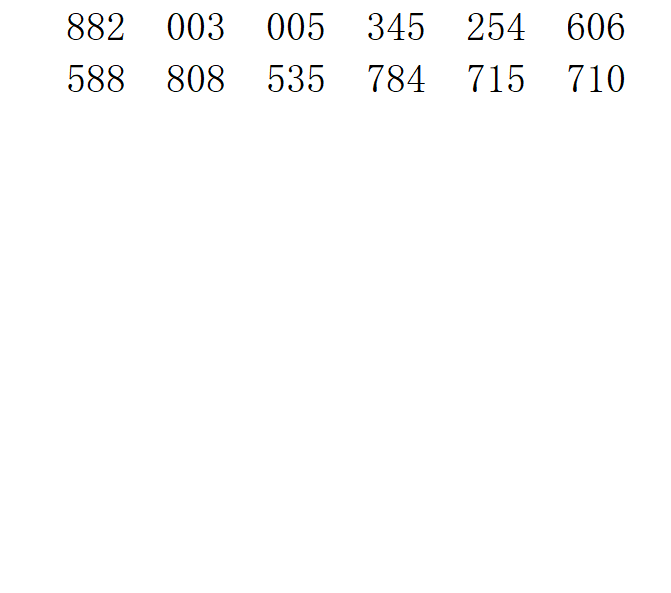

- **Prinsip:**  
  Mengurutkan data berdasarkan digit per digit menggunakan counting sort.
- **Kompleksitas Waktu:**
  - O(nk), di mana k adalah jumlah digit terbesar.
- **Kompleksitas Ruang:** O(n+k)

**Kelebihan:**
- Linear time sorting untuk data numerik kecil.
- Sangat cepat untuk dataset angka dengan rentang kecil.

**Kekurangan:**
- Bukan comparison-based (hanya untuk data numerik).
- Membutuhkan ruang tambahan untuk counting array.

## Tugas 3 : Implementasi Algoritma

Algoritma yang Diimplementasikan:

**Algoritma Pencarian**

|Algoritma | Prinsip |
|-----------------------|----------------------------------------------|
|Jump Search| Melompat sebesar √n langkah, lalu linear search pada blok relevan. |
|Interpolation Search| Mengestimasi posisi berdasarkan nilai kunci, cocok untuk data dengan distribusi merata. |

---

**Algoritma Pengurutan**

|Algoritma| Prinsip |
|----------|-----------------------------------------------------------------|
|Heap Sort| Membentuk heap dari data, kemudian ekstraksi elemen maksimum satu per satu. |
|Radix Sort| Mengurutkan data berdasarkan digit per digit menggunakan counting sort. |

---

**Langkah Implementasi**

1. Membuat data dummy transaksi.
2. Mengimplementasikan algoritma pencarian dan pengurutan.
3. Melakukan benchmarking waktu eksekusi.
4. Membandingkan hasil performa.

### Import Library

In [64]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import time
import math
import heapq

### Synthetic Dataset Creation

- Implementasikan algoritma pencarian dan pengurutan yang dipilih dalam bahasa pemrograman (bebas pilih).
- Buatlah dataset transaksi tiruan dengan minimal 10.000 data sebagai bahan pengujian. Data memiliki: ID, Nama Pelanggan, Tanggal Pembelian, Jumlah pembelian
- Uji performa algoritma pada dataset tersebut dan bandingkan waktu eksekusinya untuk kasus pencarian dan pengurutan yg telah dipilih.

In [65]:
# Define a list of common Indonesian first names and last names
first_names = [
    "Aisyah", "Ali", "Ani", "Aditya", "Alex","Andi", "Budi", "Citra", "Dewi", "Eka", "Faisal", "Gita", "Hani", "Indra", "Joko",
    "Nabila", "Kartika", "Lusi", "Mila", "Nanda", "Oki", "Putri", "Rina", "Salsa", "Tono", "Udin", "Umar", "Vina", "Wulan", "Yanti", "Zain",
    "Abdi", "Bagus", "Cahya", "Daniel","Danang", "Erlangga", "Eric", "Farah", "Farras", "Galih", "Hafiz", "Ilham", "Jihan",
    "Kirana", "Lutfi", "Mahesa", "Nadya", "Nabil", "Omar", "Pram", "Qila", "Rafi", "Syifa", "Tari", "Tirta",
    "Utami", "Valen", "Wira", "Xenia", "Yusuf", "Yohan", "Zara", "Dian", "Tariq", "Mega", "Dimas", "Dudung",
    "Nurul", "Habib", "Alya", "Reza", "Sekar", "Teguh", "Ajeng", "Bintang", "Cindy", "Danu", "Gilbert",
    "Elok", "Fikri", "Gilang", "Hanif", "Iqbal", "Jamil", "Jamal", "Kiki", "Laras", "Maya", "Niko", "Neneng",
    "Odelia", "Pandu", "Qomar", "Rizky", "Siska", "Tiara", "Ulya", "Veron", "Wahyu", "Zidan", "Zain"
]

last_names = [
    "Agung", "Aji", "Andini", "Permana", "Kusuma", "Rahayu", "Saputra", "Wijaya", "Hidayat", "Nugroho", "Santoso",
    "Pratiwi", "Wulandari", "Sari", "Hartati", "Setiawan", "Kurniawan", "Ramadhan", "Pratama", "Amelia", "Dwiputra",
    "Febriana", "Intan", "Maulana", "Novitasari", "Oktaviani", "Bayhaqie", "Yudhoyono", "Harimurti", "Nugraha",
    "Utama", "Anggara", "Saputri", "Ramdani", "Fadilah", "Putra", "Wijanarko", "Adinata", "Firmansyah", "Rizal",
    "Mahardika", "Halim", "Fitriani", "Yuliana", "Kusnadi", "Wibowo", "Aryani", "Lestari", "Ramdhan", "Surya",
    "Basuki", "Susanti", "Sutrisno", "Yunita", "Supriyadi", "Rosadi", "Wijaningsih", "Maulida", "Permadi", "Sapari",
    "Nugraheni", "Irwansyah", "Almira", "Satya", "Hardiansyah", "Ambarwati", "Rohman", "Nurfadilah", "Syahrul", "Yusuf",
    "Widyawati", "Susanti", "Yap", "Widodo", "Subianto", "Baswedan", "Baswedan", "Sulistyo", "Uno"
]

# Function to generate a random Indonesian name
def generate_indonesian_name():
    return f"{random.choice(first_names)} {random.choice(last_names)}"

# Function to generate a random time (biased toward prime time)
def generate_biased_time():
    # Define weighted hours
    prime_hours = [18, 19, 20, 21] * 6       # Heavily weighted
    normal_hours = list(range(0, 24)) * 1    # Less weighted
    weighted_hours = prime_hours + normal_hours

    hour = random.choice(weighted_hours)
    minute = random.randint(0, 59)
    second = random.randint(0, 59)
    return timedelta(hours=hour, minutes=minute, seconds=second)

# Generate 10,000 random transactions
num_transactions = 10000
transactions = []
start_date = datetime(2024, 1, 1)

for i in range(num_transactions):
    customer_id = i + 1
    customer_name = generate_indonesian_name()
    random_day = timedelta(days=random.randint(0, 365))
    random_time = generate_biased_time()
    purchase_datetime = start_date + random_day + random_time

    purchase_amount = round(random.uniform(10000, 500000), 2)
    transactions.append([
        customer_id,
        customer_name,
        purchase_datetime,
        purchase_amount
    ])

# Create a DataFrame
df = pd.DataFrame(transactions, columns=[
    "ID Pelanggan", "Nama Pelanggan", "Waktu Pembelian", "Jumlah Pembelian"
])

# Save to CSV
df.to_csv("synthetic.csv", index=False)

In [66]:
display(df)

,ID Pelanggan,Nama Pelanggan,Waktu Pembelian,Jumlah Pembelian
0,1,Pandu Fadilah,2024-09-13 03:38:58,260129.69
1,2,Mega Nugroho,2024-11-26 19:57:52,363196.05
2,3,Yohan Permana,2024-12-11 20:57:01,371171.00
3,4,Iqbal Bayhaqie,2024-01-26 12:44:00,159405.54
4,5,Fikri Febriana,2024-07-05 21:43:27,191281.72
...,...,...,...,...
9995,9996,Mila Rahayu,2024-04-24 21:09:16,272696.08
9996,9997,Mega Subianto,2024-01-10 21:20:27,159759.31
9997,9998,Tirta Yap,2024-08-30 18:31:02,360801.27
9998,9999,Joko Aji,2024-01-12 22:01:03,31660.40


### Implementasi Algoritma Pencarian

#### Sequential Search

In [67]:
def sequential_search(data, key):
    for i in range(len(data)):
        if data[i] == key:
            return i
    return -1

#### Jump Search

In [68]:
def jump_search(arr, x):
    n = len(arr)
    step = int(math.sqrt(n))
    prev = 0
    while arr[min(step, n) - 1] < x:
        prev = step
        step += int(math.sqrt(n))
        if prev >= n:
            return -1
    while arr[prev] < x:
        prev += 1
        if prev == min(step, n):
            return -1
    if arr[prev] == x:
        return prev
    return -1

#### Interpolation Search

In [69]:
def interpolation_search(arr, x):
    low = 0
    high = len(arr) - 1

    while low <= high and x >= arr[low] and x <= arr[high]:
        pos = low + int(((float(high - low) / (len(arr[high]) - len(arr[low]) + 1e-10)) * (len(x) - len(arr[low]))))

        pos = max(low, min(pos, high))

        if arr[pos] == x:
            return pos
        if arr[pos] < x:
            low = pos + 1
        else:
            high = pos - 1
    return -1

In [70]:
def interpolation_search_numerical(arr, x):
    low = 0
    high = len(arr) - 1

    while low <= high and x >= arr[low] and x <= arr[high]:
        # Handle potential division by zero if arr[high] and arr[low] are the same
        if arr[high] == arr[low]:
            if arr[low] == x:
                return low
            else:
                return -1

        # Estimate the position of x
        pos = low + int(((float(high - low) / (arr[high] - arr[low])) * (x - arr[low])))

        # Ensure the calculated position is within the valid range
        pos = max(low, min(pos, high))

        if arr[pos] == x:
            return pos
        if arr[pos] < x:
            low = pos + 1
        else:
            high = pos - 1
    return -1

#### System for Nama Pelanggan

In [71]:
# Sort the data by customer ID for jump search and interpolation search
df_sorted = df.sort_values('Nama Pelanggan')

# Example usage (search for customer ID 5000)
customer_id_to_search = "Abdi Amelia"

# Convert Nama Pelanggan to a list
customer_ids = df_sorted['Nama Pelanggan'].tolist()

In [72]:
display(df_sorted)

,ID Pelanggan,Nama Pelanggan,Waktu Pembelian,Jumlah Pembelian
2023,2024,Abdi Adinata,2024-12-13 21:01:20,306456.02
7805,7806,Abdi Adinata,2024-10-10 05:02:06,145261.83
559,560,Abdi Agung,2024-04-12 12:34:22,354369.69
7102,7103,Abdi Aji,2024-07-13 05:50:22,33490.67
3286,3287,Abdi Almira,2024-03-14 21:05:09,136734.20
...,...,...,...,...
7736,7737,Zidan Yap,2024-08-13 14:55:51,446631.82
2973,2974,Zidan Yudhoyono,2024-05-15 18:59:48,134552.31
8727,8728,Zidan Yuliana,2024-11-10 06:25:49,172532.80
7841,7842,Zidan Yuliana,2024-05-29 17:48:55,31129.33


#### System for ID Pelanggan

In [73]:
# Sort the data by customer ID for jump search and interpolation search
df_sort = df.sort_values('ID Pelanggan')

# Example usage (search for customer ID 6732)
customer_to_search = 6732

# Convert ID Pelanggan to a list
customer = df_sort['ID Pelanggan'].tolist()

In [74]:
display(df_sort)

,ID Pelanggan,Nama Pelanggan,Waktu Pembelian,Jumlah Pembelian
0,1,Pandu Fadilah,2024-09-13 03:38:58,260129.69
1,2,Mega Nugroho,2024-11-26 19:57:52,363196.05
2,3,Yohan Permana,2024-12-11 20:57:01,371171.00
3,4,Iqbal Bayhaqie,2024-01-26 12:44:00,159405.54
4,5,Fikri Febriana,2024-07-05 21:43:27,191281.72
...,...,...,...,...
9995,9996,Mila Rahayu,2024-04-24 21:09:16,272696.08
9996,9997,Mega Subianto,2024-01-10 21:20:27,159759.31
9997,9998,Tirta Yap,2024-08-30 18:31:02,360801.27
9998,9999,Joko Aji,2024-01-12 22:01:03,31660.40


#### System for Jumlah Pembelian

In [75]:
# Sort the data by customer ID for jump search and interpolation search
df_sorts = df.sort_values('ID Pelanggan')

# Example usage (search for customer ID 6732)
customer_buy_to_search = 6732

# Convert ID Pelanggan to a list
customers = df_sorts['ID Pelanggan'].tolist()

In [76]:
display(df_sorts)

,ID Pelanggan,Nama Pelanggan,Waktu Pembelian,Jumlah Pembelian
0,1,Pandu Fadilah,2024-09-13 03:38:58,260129.69
1,2,Mega Nugroho,2024-11-26 19:57:52,363196.05
2,3,Yohan Permana,2024-12-11 20:57:01,371171.00
3,4,Iqbal Bayhaqie,2024-01-26 12:44:00,159405.54
4,5,Fikri Febriana,2024-07-05 21:43:27,191281.72
...,...,...,...,...
9995,9996,Mila Rahayu,2024-04-24 21:09:16,272696.08
9996,9997,Mega Subianto,2024-01-10 21:20:27,159759.31
9997,9998,Tirta Yap,2024-08-30 18:31:02,360801.27
9998,9999,Joko Aji,2024-01-12 22:01:03,31660.40


#### Benchmarking

In [77]:
# Sequential Search
start_time = time.time()
index_sequential = sequential_search(customer_ids, customer_id_to_search)
end_time = time.time()
sequential_search_time = end_time - start_time

# Jump Search
start_time = time.time()
index_jump = jump_search(customer_ids, customer_id_to_search)
end_time = time.time()
jump_search_time = end_time - start_time

# Interpolation Search
start_time = time.time()
index_interpolation = interpolation_search(customer_ids, customer_id_to_search)
end_time = time.time()
interpolation_search_time = end_time - start_time

In [78]:
print(f"Sequential Search for Customer: Index = {index_sequential}, Time = {sequential_search_time:.6f} seconds")
print(f"Jump Search for Customer: Index = {index_jump}, Time = {jump_search_time:.6f} seconds")
print(f"Interpolation Search for Customer: Index = {index_interpolation}, Time = {interpolation_search_time:.6f} seconds")

Sequential Search for Customer: Index = -1, Time = 0.003725 seconds
Jump Search for Customer: Index = -1, Time = 0.000054 seconds
Interpolation Search for Customer: Index = -1, Time = 0.000064 seconds


In [79]:
# Sequential Search
start_time = time.time()
index_sequential = sequential_search(customer, customer_to_search)
end_time = time.time()
sequential_search_time = end_time - start_time

# Jump Search
start_time = time.time()
index_jump = jump_search(customer, customer_to_search)
end_time = time.time()
jump_search_time = end_time - start_time

# Interpolation Search
start_time = time.time()
index_interpolation = interpolation_search_numerical(customer, customer_to_search)
end_time = time.time()
interpolation_search_time = end_time - start_time

In [80]:
print(f"Sequential Search for Customer: Index = {index_sequential}, Time = {sequential_search_time:.6f} seconds")
print(f"Jump Search for Customer: Index = {index_jump}, Time = {jump_search_time:.6f} seconds")
print(f"Interpolation Search for Customer: Index = {index_interpolation}, Time = {interpolation_search_time:.6f} seconds")

Sequential Search for Customer: Index = 6731, Time = 0.000347 seconds
Jump Search for Customer: Index = 6731, Time = 0.000085 seconds
Interpolation Search for Customer: Index = 6731, Time = 0.000044 seconds


In [81]:
# Sequential Search
start_time = time.time()
index_sequential = sequential_search(customers, customer_buy_to_search)
end_time = time.time()
sequential_search_time = end_time - start_time

# Jump Search
start_time = time.time()
index_jump = jump_search(customers, customer_buy_to_search)
end_time = time.time()
jump_search_time = end_time - start_time

# Interpolation Search
start_time = time.time()
index_interpolation = interpolation_search_numerical(customers, customer_buy_to_search)
end_time = time.time()
interpolation_search_time = end_time - start_time

In [82]:
print(f"Sequential Search for Customer: Index = {index_sequential}, Time = {sequential_search_time:.6f} seconds")
print(f"Jump Search for Customer: Index = {index_jump}, Time = {jump_search_time:.6f} seconds")
print(f"Interpolation Search for Customer: Index = {index_interpolation}, Time = {interpolation_search_time:.6f} seconds")

Sequential Search for Customer: Index = 6731, Time = 0.000268 seconds
Jump Search for Customer: Index = 6731, Time = 0.000078 seconds
Interpolation Search for Customer: Index = 6731, Time = 0.000037 seconds


##### Kompleksitas Waktu
- **Jump Search**:  
  $\mathcal{O}(\sqrt{n})$

- **Interpolation Search**:  
  - Rata-rata: $\mathcal{O}(\log \log n)$  
  - Kasus Terburuk: $\mathcal{O}(n)$

---

##### Kompleksitas Ruang
- Kedua algoritma **Jump Search** dan **Interpolation Search** memiliki kompleksitas ruang:  
  $\mathcal{O}(1)$  
  (in-place, tanpa memori tambahan yang signifikan)

---

##### Hasil Perbandingan

- **Jump Search** bekerja optimal pada data yang **terurut dan terdistribusi merata**.  
  Algoritma ini lebih cepat dari pencarian linear, namun masih kalah dari **interpolation search** dalam rata-rata kasus dengan distribusi data seragam.

- **Interpolation Search** sangat efisien ketika data memiliki **distribusi seragam (uniform)**.  
  Kompleksitas rata-ratanya yang hanya $\mathcal{O}(\log \log n)$ menjadikannya sangat cocok untuk dataset besar dengan penyebaran nilai yang konsisten.

- Pada dataset yang besar, **interpolation search** lebih unggul dibanding **Jump Search** jika data bersifat **uniform**.  
  Namun, jika data **tidak terdistribusi merata**, **jump search** menjadi alternatif yang lebih stabil.

- Dalam kasus dataset seperti **Nama pelanggan**, yang umumnya memiliki **pola distribusi seragam**, maka:
  > **Interpolation Search lebih disarankan karena diperkirakan memiliki performa lebih cepat jika data telah diurutkan.**


### Implementasi Algoritma Pengurutan

#### Heap Sort

In [83]:
def heap_sort(arr):
    heapq.heapify(arr)
    return [heapq.heappop(arr) for _ in range(len(arr))]

#### Radix Sort

In [84]:
def counting_sort(arr, exp):
    n = len(arr)
    output = [0] * (n)
    count = [0] * (10)

    # Store count of occurrences in count[]
    for i in range(0, n):
        # Convert element to int if it is a number, handle other types with a default value
        index = int(arr[i] // exp) if isinstance(arr[i], (int, float)) else 0
        count[(index) % 10] += 1

    # Change count[i] so that count[i] now contains actual
    # position of this digit in output[]
    for i in range(1, 10):
        count[i] += count[i - 1]

    # Build the output array
    i = n - 1
    while i >= 0:
        index = int(arr[i] // exp) if isinstance(arr[i], (int, float)) else 0
        output[count[(index) % 10] - 1] = arr[i]
        count[(index) % 10] -= 1
        i -= 1

    # Copying the output array to arr[],
    # so that arr now contains sorted numbers
    for i in range(0, len(arr)):
        arr[i] = output[i]
    return arr

def radix_sort(arr):
    # Find the maximum number to know number of digits
    if arr and isinstance(arr[0], (int, float)):  # Check if the array is not empty and elements are numeric
        max1 = max(arr)
    else:
        max1 = 0  # Handle empty or non-numeric arrays

    # Do counting sort for every digit. Note that instead
    # of passing digit number, exp is passed. exp is 10^i
    # where i is current digit number
    num_digits = len(str(int(max1))) if max1 else 0
    for exp in [10**i for i in range(num_digits)]:
        arr = counting_sort(arr, exp)

    return arr

In [85]:
# Untuk dataset kita akan menggunakan Kolom `Jumlah Pembelian`
transaction_amounts = df['Jumlah Pembelian'].tolist()

#### Benchmarking

In [86]:
# Heap Sort
start_time = time.time()
heap_sorted_amounts = heap_sort(transaction_amounts.copy())
end_time = time.time()
heap_sort_time = end_time - start_time

In [87]:
print(heap_sorted_amounts)

[10063.75, 10125.16, 10147.81, 10177.65, 10370.84, 10423.06, 10465.3, 10478.27, 10575.26, 10577.73, 10605.14, 10606.39, 10612.38, 10628.82, 10661.28, 10671.77, 10732.29, 10914.43, 10939.23, 10983.15, 10999.22, 11193.73, 11219.13, 11245.26, 11253.53, 11259.09, 11311.51, 11343.49, 11382.46, 11400.13, 11583.04, 11830.88, 12045.27, 12107.81, 12136.79, 12274.82, 12297.08, 12300.49, 12334.21, 12336.02, 12444.53, 12467.71, 12481.79, 12485.03, 12732.0, 12772.43, 12874.44, 12880.38, 13055.15, 13210.16, 13328.33, 13417.21, 13670.31, 13702.49, 13868.51, 13877.05, 13924.11, 14000.51, 14016.3, 14089.79, 14115.0, 14239.16, 14267.49, 14297.92, 14303.74, 14351.4, 14394.01, 14401.99, 14612.62, 14659.89, 14693.21, 14710.27, 14727.82, 14735.62, 14736.72, 14769.64, 14792.08, 14794.89, 14836.29, 14856.19, 14876.69, 14978.57, 15000.98, 15008.05, 15027.67, 15050.61, 15080.51, 15200.06, 15254.02, 15281.97, 15285.24, 15349.09, 15465.76, 15514.3, 15550.86, 15645.59, 15665.87, 15723.48, 15916.55, 15974.92, 16032

In [88]:
# Radix Sort
start_time = time.time()
radix_sorted_amounts = radix_sort(transaction_amounts.copy())
end_time = time.time()
radix_sort_time = end_time - start_time

In [89]:
print(radix_sorted_amounts)

[10063.75, 10125.16, 10147.81, 10177.65, 10370.84, 10423.06, 10465.3, 10478.27, 10575.26, 10577.73, 10605.14, 10606.39, 10612.38, 10628.82, 10661.28, 10671.77, 10732.29, 10914.43, 10939.23, 10983.15, 10999.22, 11193.73, 11219.13, 11245.26, 11253.53, 11259.09, 11311.51, 11343.49, 11382.46, 11400.13, 11583.04, 11830.88, 12045.27, 12107.81, 12136.79, 12274.82, 12297.08, 12300.49, 12334.21, 12336.02, 12444.53, 12467.71, 12481.79, 12485.03, 12732.0, 12772.43, 12874.44, 12880.38, 13055.15, 13210.16, 13328.33, 13417.21, 13670.31, 13702.49, 13868.51, 13877.05, 13924.11, 14000.51, 14016.3, 14089.79, 14115.0, 14239.16, 14267.49, 14297.92, 14303.74, 14351.4, 14394.01, 14401.99, 14612.62, 14659.89, 14693.21, 14710.27, 14727.82, 14735.62, 14736.72, 14769.64, 14792.08, 14794.89, 14836.29, 14856.19, 14876.69, 14978.57, 15000.98, 15008.05, 15027.67, 15050.61, 15080.51, 15200.06, 15254.02, 15281.97, 15285.24, 15349.09, 15465.76, 15514.3, 15550.86, 15645.59, 15665.87, 15723.48, 15916.55, 15974.92, 16032

In [90]:
print(f"Heap Sort Time: {heap_sort_time:.6f} seconds")
print(f"Radix Sort Time: {radix_sort_time:.6f} seconds")

Heap Sort Time: 0.002615 seconds
Radix Sort Time: 0.040871 seconds


#### Kompleksitas Algoritma

##### Heap Sort
- **Time Complexity**:
  - Terbaik: $\mathcal{O}(n \log n)$  
  - Rata-rata: $\mathcal{O}(n \log n)$  
  - Terburuk: $\mathcal{O}(n \log n)$
- **Space Complexity**: $\mathcal{O}(1)$ (in-place)

##### Radix Sort
- **Time Complexity**:
  - Terbaik: $\mathcal{O}(nk)$  
  - Rata-rata: $\mathcal{O}(nk)$  
  - Terburuk: $\mathcal{O}(nk)$  
  - Di mana `k` adalah jumlah digit pada angka terbesar
- **Space Complexity**: $\mathcal{O}(n + k)$

---

##### Pertimbangan Penggunaan

- Untuk **data transaksi berukuran besar**, **Radix Sort** bisa lebih cepat jika nilai transaksi memiliki **rentang (range) yang relatif kecil** dan jumlah digit (`k`) tidak terlalu besar.
- Namun, jika transaksi memiliki **angka besar dengan digit bervariasi atau range lebar**, maka **Heap Sort lebih stabil** dan konsisten dalam performa.
- Dalam kasus ini, penting untuk mempertimbangkan juga **jumlah digit (`k`) dari nominal transaksi**, karena hal tersebut akan mempengaruhi efisiensi **Radix Sort** secara signifikan.

> Gunakan **Radix Sort** untuk transaksi dengan nominal seragam dan digit pendek  
> Gunakan **Heap Sort** untuk kasus umum dengan variasi transaksi yang luas

## Additional : Kombinasi Implementasi Algoritma Pengurutan dan Pencarian

In [92]:
def combined_search_sort(search_algorithm, sort_algorithm, data, key):
    start_time = time.time()

    if sort_algorithm == "heap_sort":
        sorted_data = heap_sort(data.copy())
    elif sort_algorithm == "radix_sort":
        sorted_data = radix_sort(data.copy())
    else:
        raise ValueError("Invalid sort algorithm")

    sort_end_time = time.time()
    sort_time = sort_end_time-start_time

    if search_algorithm == "sequential_search":
        index = sequential_search(sorted_data, key)
    elif search_algorithm == "jump_search":
        index = jump_search(sorted_data, key)
    elif search_algorithm == "interpolation_search":
        index = interpolation_search(sorted_data, key)
    else:
        raise ValueError("Invalid search algorithm")

    end_time = time.time()
    search_time = end_time-sort_end_time
    total_time = end_time - start_time

    return index, sort_time, search_time, total_time

# Example usage:
customer_id_to_search = "Hanif Ramdhan"
customer_ids = df_sorted['Nama Pelanggan'].tolist()

#Combinations
combinations = [
    ("sequential_search", "heap_sort"),
    ("sequential_search", "radix_sort"),
    ("jump_search", "heap_sort"),
    ("jump_search", "radix_sort"),
    ("interpolation_search", "heap_sort"),
    ("interpolation_search", "radix_sort"),
]

for search_algo, sort_algo in combinations:
    index, sort_time, search_time, total_time = combined_search_sort(search_algo, sort_algo, customer_ids, customer_id_to_search)
    print(f"Combination for Searching Name : {search_algo.replace('_',' ').title()} with {sort_algo.replace('_',' ').title()}")
    print(f"  Index: {index}")
    print(f"  Sort Time: {sort_time:.6f} seconds")
    print(f"  Search Time: {search_time:.6f} seconds")
    print(f"  Total Time: {total_time:.6f} seconds")
    print("-" * 20)

Combination for Searching Name : Sequential Search with Heap Sort
  Index: 3693
  Sort Time: 0.005930 seconds
  Search Time: 0.000334 seconds
  Total Time: 0.006264 seconds
--------------------
Combination for Searching Name : Sequential Search with Radix Sort
  Index: 3693
  Sort Time: 0.000045 seconds
  Search Time: 0.000182 seconds
  Total Time: 0.000228 seconds
--------------------
Combination for Searching Name : Jump Search with Heap Sort
  Index: 3693
  Sort Time: 0.003318 seconds
  Search Time: 0.000041 seconds
  Total Time: 0.003359 seconds
--------------------
Combination for Searching Name : Jump Search with Radix Sort
  Index: 3693
  Sort Time: 0.000040 seconds
  Search Time: 0.000028 seconds
  Total Time: 0.000068 seconds
--------------------
Combination for Searching Name : Interpolation Search with Heap Sort
  Index: 3693
  Sort Time: 0.003692 seconds
  Search Time: 0.000033 seconds
  Total Time: 0.003725 seconds
--------------------
Combination for Searching Name : Inte